<a href="https://colab.research.google.com/github/karsarobert/DeepLearning2024/blob/main/10/PTE_DL10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Naive forecasting

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l08c03_moving_average.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l08c03_moving_average.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
keras = tf.keras

In [ ]:
temp = pd.read_csv(
    "https://raw.githubusercontent.com/karsarobert/DeepLearning2024/main/temp.csv", header=None)


In [ ]:
temp

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3642,14.0
3643,13.6
3644,13.5
3645,15.7


In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Idő")
    plt.ylabel("Hőmérséklet")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)



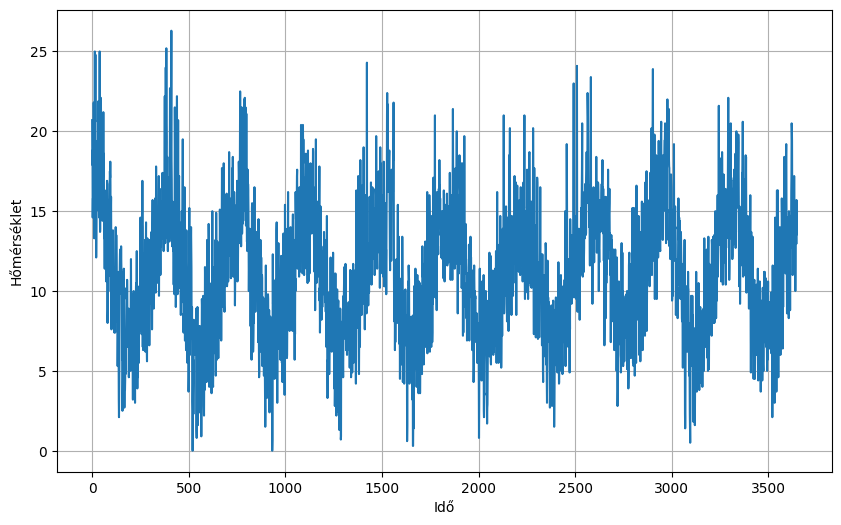

In [ ]:
time = np.arange(len(temp))
series = temp.to_numpy() #dataframe konvertálása numpy tömbre 3647 adatpont

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Trend and Seasonality

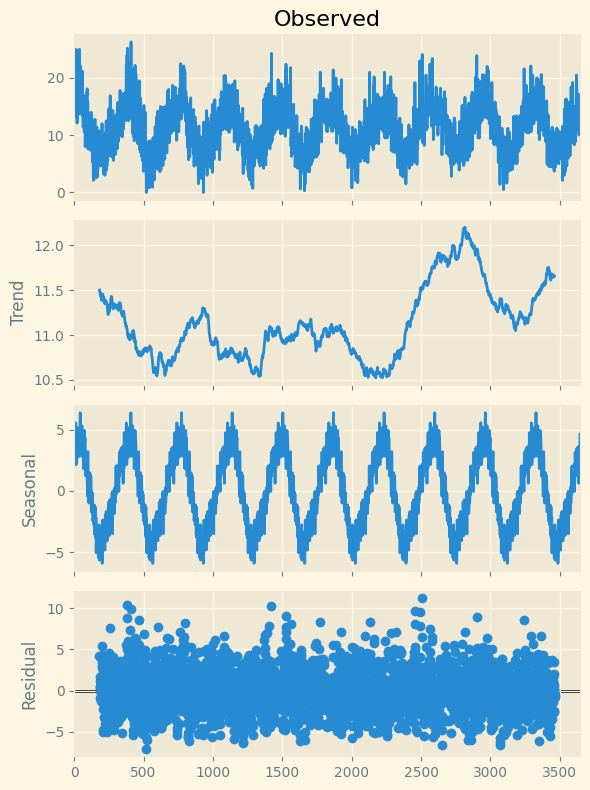

In [ ]:
from matplotlib import pyplot as plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6, 8
plot.style.use('Solarize_Light2')

ts1 = series
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='additive',period=365)
result.plot()
plot.show()

## Naive Forecast

In [ ]:
split_time = 1000
time_train = time[:split_time] #1000. adatpontig tréning halmaz
x_train = series[:split_time]
time_valid = time[split_time:] #1000. adatponttól validációs halmaz
x_valid = series[split_time:]

naive_forecast = series[split_time - 1:-1] # naív előre jelzés: mindig az egyel korábbi adatpont az előrejelzés

In [ ]:
series[1000:1005]

array([[ 9.6],
       [ 9.3],
       [13.9],
       [ 7.7],
       [ 9.5]])

In [ ]:
naive_forecast[:5]

array([[10.6],
       [ 9.6],
       [ 9.3],
       [13.9],
       [ 7.7]])

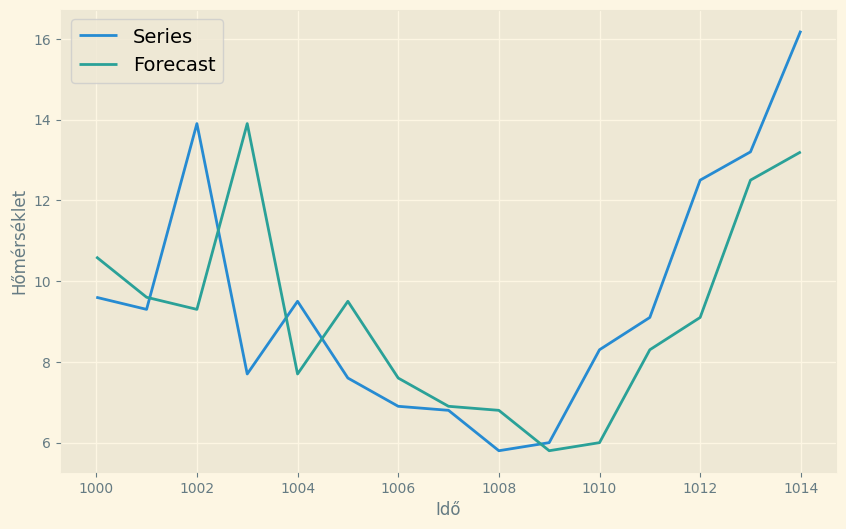

In [ ]:

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=15, label="Series") # 150 adatpont az idősorból
plot_series(time_valid, naive_forecast, start=0, end=15, label="Forecast") # 150 adatpont az előrejelzésből

Now let's compute the mean absolute error between the forecasts and the predictions in the validation period:

In [ ]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae


2.0831885153003404